# Penguin Species Prediction

I try to create the best model whether using Naive Bayes or KNN from the given the dataset 'penguin.csv' to predict penguin species from anatomical information. Each penguin comes from one of three species: Adelie, Gento, and Chinstrap. The anatomical information contained in the dataset is described as follows:   
- island a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)  
- bill_length_mm a number denoting bill length (millimeters)  
- bill_depth_mm a number denoting bill depth (millimeters)  
- flipper_length_mm an integer denoting flipper length (millimeters)  
- body_mass_g an integer denoting body mass (grams)  
- sex a factor denoting penguin sex (female, male) 
  
  

## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Collect and pre-process the data

In [5]:
pengu=pd.read_csv("penguin.csv")
pengu2=pengu.copy(deep=True)

pengu.sample(n=8, random_state=42).sort_index()

pengu.head()

,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
0,Biscoe,MALE,41.3,21.1,195.0,4400.0,Adelie
1,Biscoe,FEMALE,39.6,20.7,191.0,3900.0,Adelie
2,Biscoe,MALE,45.6,20.3,191.0,4600.0,Adelie
3,Biscoe,MALE,41.0,20.0,203.0,4725.0,Adelie
4,Biscoe,MALE,38.2,20.0,190.0,3900.0,Adelie


In [6]:
pengu.shape

(294, 7)

Dataset contains of total with 294 data and 7 features (include 1 target)

In [7]:
pengu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             294 non-null    object 
 1   sex                284 non-null    object 
 2   culmen_length_mm   292 non-null    float64
 3   culmen_depth_mm    292 non-null    float64
 4   flipper_length_mm  292 non-null    float64
 5   body_mass_g        292 non-null    float64
 6   species            294 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.2+ KB


3 of the features were categorical data and 4 of it were numerical data

In [8]:
#Handle the categorical data
feature_cat=pengu[["island", "sex","species"]]

from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder()
label_ord_encoder=OrdinalEncoder()
feature_encoded=ord_encoder.fit_transform(feature_cat)

pengu2[["island", "sex","species"]] = feature_encoded


In [9]:
pengu2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             294 non-null    float64
 1   sex                284 non-null    float64
 2   culmen_length_mm   292 non-null    float64
 3   culmen_depth_mm    292 non-null    float64
 4   flipper_length_mm  292 non-null    float64
 5   body_mass_g        292 non-null    float64
 6   species            294 non-null    float64
dtypes: float64(7)
memory usage: 16.2 KB


In [10]:
# Find the correlation between species and each features
pengu2.corr()["species"]

island              -0.619221
sex                 -0.013880
culmen_length_mm     0.736759
culmen_depth_mm     -0.753634
flipper_length_mm    0.858789
body_mass_g          0.749267
species              1.000000
Name: species, dtype: float64

**sex** have **weak correlation** to predict the species, so we can eliminate it

In [11]:
pengu2.drop('sex', inplace=True, axis=1)

In [12]:
pengu2.isnull().sum()

island               0
culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
species              0
dtype: int64

There were missing values that we need to eliminate

In [13]:
#Eliminate missing values by delete the row of the missing values
pengu2=pengu2.dropna(subset=['culmen_length_mm'])

In [14]:
pengu2.isnull().sum()

island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
species              0
dtype: int64

In [15]:
pengu2.describe()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.688356,43.636644,17.243151,199.921233,4162.243151,0.852740
std,0.738347,5.458698,1.961482,13.651679,785.799341,0.894173
min,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,39.000000,15.675000,190.000000,3550.000000,0.000000
50%,1.000000,43.350000,17.600000,196.000000,4000.000000,1.000000
75%,1.000000,48.250000,18.800000,212.000000,4731.250000,2.000000
max,2.000000,58.000000,21.500000,231.000000,6300.000000,2.000000


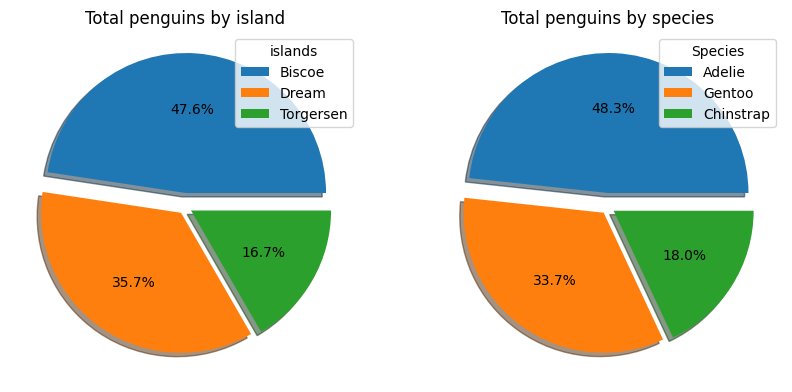

In [16]:
#Data visualization based on islands and species

island_ = pengu['island'].value_counts()
species_ = pengu['species'].value_counts()

fig = plt.figure(figsize=(10, 10))
explode = (0.1, 0.05, 0.05)
ax1 = fig.add_subplot(2, 2, 1)
ax1.pie(island_.values, explode=explode, shadow=True, autopct='%1.1f%%')
ax1.set_title("Total penguins by island")
ax1.legend(island_.keys(), title ="islands")

ax2 = fig.add_subplot(2, 2, 2)
ax2.pie(species_.values, explode=explode, shadow=True, autopct='%1.1f%%')
ax2.set_title("Total penguins by species")
ax2.legend(species_.keys(), title ="Species")

Almost half of the penguins were in Biscoe island and were _Adelie sp._

In [17]:
x=pengu2.drop('species', axis=1)
y=pengu2['species'].copy()

## Step 3: Split the Data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=0)
x_train.shape, x_test.shape

((204, 5), (88, 5))

## Step 4: Build and train the model

### Naive Baiyes 

In [19]:
from sklearn.naive_bayes import BernoulliNB
model_nb = BernoulliNB()
model_nb.fit(x_train, y_train);
nb_train_pred = model_nb.predict(x_train)

In [20]:
# Check the Accuracy
from sklearn.metrics import accuracy_score
nb_train_acc = accuracy_score(y_train, nb_train_pred)
print('Train Accuracy:', round(nb_train_acc*100,2),'%')

Train Accuracy: 68.14 %


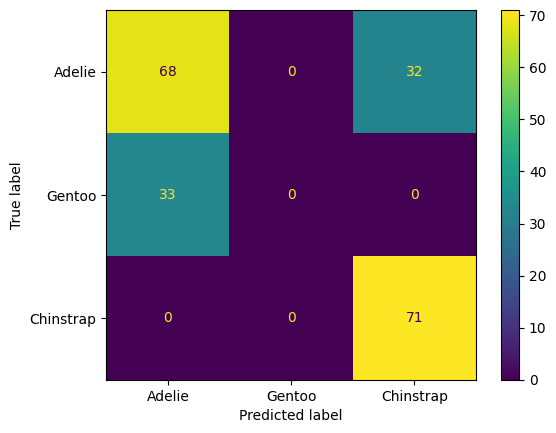

In [21]:
# Get the confusion matrix
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay)
labels = ['Adelie', 'Gentoo','Chinstrap']
cm_train_nb = confusion_matrix(y_train,nb_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train_nb,
display_labels=labels)
disp.plot()

In [22]:
# Get the classification Report
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
print(classification_report(y_train, nb_train_pred,
target_names=labels))

              precision    recall  f1-score   support

      Adelie       0.67      0.68      0.68       100
      Gentoo       0.00      0.00      0.00        33
   Chinstrap       0.69      1.00      0.82        71

    accuracy                           0.68       204
   macro avg       0.45      0.56      0.50       204
weighted avg       0.57      0.68      0.62       204



### K-NearestNeighbors (KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
parameter = []

k = range(1, 5)
metric = ['euclidean', 'manhattan', 'minkowski']

for n_k in k:
    for n_m in metric:
        clf = KNeighborsClassifier(n_neighbors=n_k, metric=n_m)
        clf.fit(x_train, y_train)
        training_accuracy.append(clf.score(x_train, y_train))
        test_accuracy.append(clf.score(x_test, y_test))
        parameter.append({'n_neighbors': n_k, 'metric': n_m})

In [24]:
data_accuracy = pd.DataFrame.from_dict(parameter)
data_accuracy['training_accuracy'] = training_accuracy
data_accuracy['test_accuracy'] = test_accuracy
data_accuracy

,n_neighbors,metric,training_accuracy,test_accuracy
0,1,euclidean,1.000000,0.750000
1,1,manhattan,1.000000,0.761364
2,1,minkowski,1.000000,0.750000
3,2,euclidean,0.887255,0.761364
4,2,manhattan,0.887255,0.750000
5,2,minkowski,0.887255,0.761364
6,3,euclidean,0.867647,0.738636
7,3,manhattan,0.872549,0.750000
8,3,minkowski,0.867647,0.738636
9,4,euclidean,0.848039,0.738636


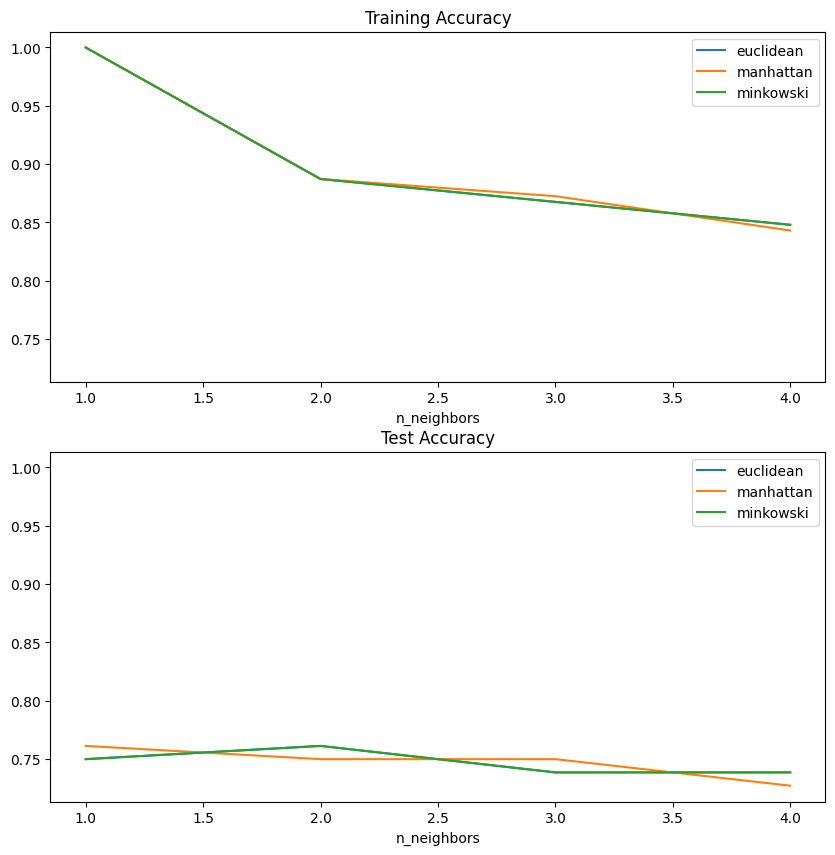

In [25]:
fig, axes = plt.subplots(2, 1, figsize=(10,10), sharey=True)

data_accuracy.set_index('n_neighbors', inplace=True)

data_accuracy.groupby('metric')['training_accuracy'].plot(legend=True, 
                                                          ax=axes[0])
axes[0].set_title('Training Accuracy')

data_accuracy.groupby('metric')['test_accuracy'].plot(legend=True, 
                                                      ax=axes[1])
axes[1].set_title('Test Accuracy')
plt.show()


In [26]:
# Check The accuracy

#Model with best parameter
knn_best_model = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
knn_best_model.fit(x_train, y_train)

#Predict for train set
knn_train_best_pred = knn_best_model.predict(x_train)
knn_best_train_acc = accuracy_score(y_train, knn_train_best_pred)
print('Train Accuracy:', round(knn_best_train_acc*100,2),'%')

Train Accuracy: 84.8 %


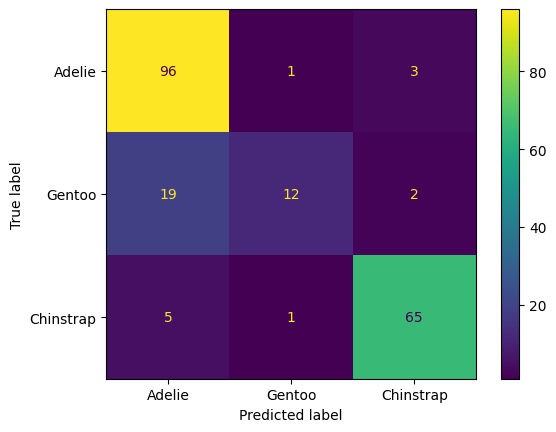

In [27]:
# Get the confusion Matrix

cm_knn_train_best = confusion_matrix(y_train, knn_train_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn_train_best,
display_labels=labels)
disp.plot()

In [28]:
# Classification Report for KNN

print(classification_report(y_train, knn_train_best_pred,
target_names=labels))

              precision    recall  f1-score   support

      Adelie       0.80      0.96      0.87       100
      Gentoo       0.86      0.36      0.51        33
   Chinstrap       0.93      0.92      0.92        71

    accuracy                           0.85       204
   macro avg       0.86      0.75      0.77       204
weighted avg       0.85      0.85      0.83       204



We see that **KNN give the best model** than Naive Baiyes to predict the species of penguins with have highest train accuracy. So, we use the **KNN model**

## Step 5:  Test and evaluate the model

### Naive Baiyes

In [29]:
# Check the Accuracy
from sklearn.metrics import accuracy_score

nb_test_pred = model_nb.predict(x_test)
nb_test_acc = accuracy_score(y_test, nb_test_pred)
print('Test Accuracy:', round(nb_test_acc*100,2),'%')

Test Accuracy: 67.05 %


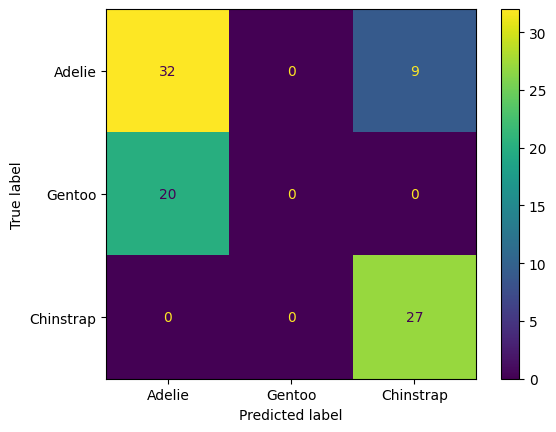

In [30]:
#Confusion Matrix

cm_test_nb = confusion_matrix(y_test,nb_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test_nb,
display_labels=labels)
disp.plot()

In [31]:
# Classification Report
print(classification_report(y_test, nb_test_pred,
target_names=labels))

              precision    recall  f1-score   support

      Adelie       0.62      0.78      0.69        41
      Gentoo       0.00      0.00      0.00        20
   Chinstrap       0.75      1.00      0.86        27

    accuracy                           0.67        88
   macro avg       0.46      0.59      0.52        88
weighted avg       0.52      0.67      0.58        88



### K-Nearest Neighbors (KNN)

In [32]:
#Predict for test set

knn_test_best_pred = knn_best_model.predict(x_test)
knn_best_test_acc = accuracy_score(y_test, knn_test_best_pred)
print('Test Accuracy:', round(knn_best_test_acc*100,2),'%')

Test Accuracy: 73.86 %


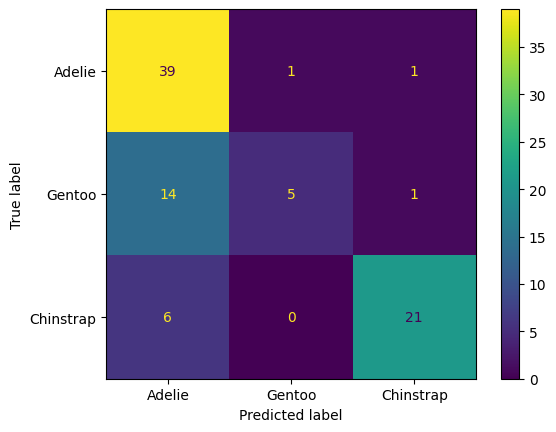

In [33]:
# Confusion Matrix
cm_knn_test_best = confusion_matrix(y_test, knn_test_best_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn_test_best,
                              display_labels=labels)
disp.plot()

In [34]:
# Classification Report
print(classification_report(y_test, knn_test_best_pred,
target_names=labels))

              precision    recall  f1-score   support

      Adelie       0.66      0.95      0.78        41
      Gentoo       0.83      0.25      0.38        20
   Chinstrap       0.91      0.78      0.84        27

    accuracy                           0.74        88
   macro avg       0.80      0.66      0.67        88
weighted avg       0.78      0.74      0.71        88



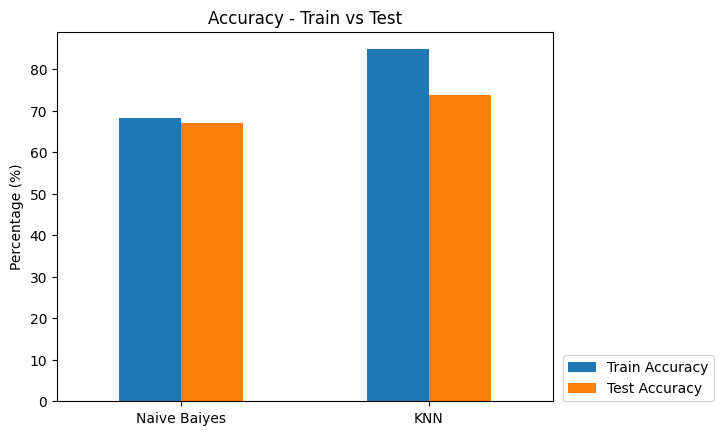

In [35]:
#Define data
data_accuracy = {'Train Accuracy': [nb_train_acc*100,knn_best_train_acc*100],
                 'Test Accuracy': [nb_test_acc*100,knn_best_test_acc*100]}

df_data_accuracy = pd.DataFrame(data_accuracy,columns=['Train Accuracy',
'Test Accuracy'],
index = ['Naive Baiyes','KNN'])

#Plot data
df_data_accuracy.plot.bar(rot=0)
plt.legend(bbox_to_anchor=(1.02, 0), loc='lower left', borderaxespad=0)
plt.title('Accuracy - Train vs Test')
plt.ylabel('Percentage (%)')
plt.show()

We see **KNN is the best model** than Naive Baiyes to predict the species of penguins with the highest accuracy. So, we use **KNN model**

## Step 6: Deploy the model

In [36]:
pengu_test=pd.read_csv('penguin_predictions.csv')
pengu_test2=pd.read_csv('penguin_predictions.csv')

pengu_test.drop('sex', inplace=True, axis=1)
pengu_test.shape

(50, 5)

In [37]:
#Handle the categorical data
feature_cat2=pengu_test["island"]
reshape=np.array(feature_cat2).reshape(-1,1)

from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder()
feature_encoded2=ord_encoder.fit_transform(reshape)

pengu_test["island"] = feature_encoded2

In [38]:
pengu_test.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,1.0,36.0,17.1,187,3700
1,1.0,34.0,17.1,185,3400
2,1.0,46.7,17.9,195,3300
3,1.0,46.5,17.9,192,3500
4,0.0,43.3,13.4,209,4400


In [39]:
# Prediction using KNN model
knn_pengu_pred = knn_best_model.predict(pengu_test)

In [40]:
pengu_test2['Species predicted']=knn_pengu_pred
pengu_test2.head()

,island,sex,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,Species predicted
0,Dream,FEMALE,36.0,17.1,187,3700,0.0
1,Dream,FEMALE,34.0,17.1,185,3400,0.0
2,Dream,FEMALE,46.7,17.9,195,3300,0.0
3,Dream,FEMALE,46.5,17.9,192,3500,0.0
4,Biscoe,FEMALE,43.3,13.4,209,4400,0.0


**Species were predicted following the encoded labes:  
0 = _Adelie sp._  
1 = _Gentoo sp._  
2 = _Chinstrap sp._**

In [41]:
pengu_test2.to_csv(" S65527_penguin_prediction_exercise4.csv",index=False)